# load data

In [1]:
train = pd.read_csv('../../../data/“达观杯”文本智能处理挑战赛/train_set.csv')
test = pd.read_csv('../../../data/“达观杯”文本智能处理挑战赛/test_set.csv')

In [2]:
train.shape
test.shape

(102277, 4)

(102277, 3)

In [3]:
train[:5]
test[:5]

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


,id,article,word_seg
0,0,7368 146447 316564 42610 55736 297797 93042 53...,816903 565958 726082 764656 335008 75094 20282...
1,1,985531 473628 1044285 1121849 206763 462208 11...,729468 520477 529032 101368 335130 520477 1113...
2,2,7368 7368 7368 7368 7368 7368 7368 7368 7368 7...,816903 816903 816903 816903 816903 816903 8169...
3,3,529819 1226459 856005 1177293 663773 272235 93...,231664 1033823 524850 330478 507199 520477 618...
4,4,42610 1252069 1077049 955883 1125260 1044285 2...,545370 379223 162767 520477 1194630 1197475 11...


In [4]:
X_train = train['word_seg']
y_train = train['class']
X_test = test['word_seg']

# data decribe

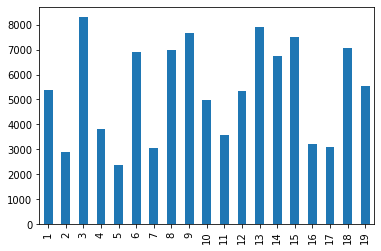

In [5]:
y_train.value_counts().sort_index().plot(kind='bar')

# TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
tfidf = TfidfVectorizer(min_df=0.1,max_df=0.9,ngram_range=(1,2),max_features=100000)

In [8]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9,
                max_features=100000, min_df=0.1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [9]:
X_train_t = tfidf.transform(X_train)
X_test_t = tfidf.transform(X_test)

In [10]:
X_test_t.shape
X_test_t.shape

(102277, 463)

(102277, 463)

# model

In [11]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression(C=4, dual=True)

In [25]:
lg.fit(X_train_t, y_train)

LogisticRegression(C=4, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_test = lg.predict(X_test_t)

In [31]:
test['class'] = y_test

In [33]:
test[['id', 'class']].to_csv('../../../data/“达观杯”文本智能处理挑战赛/result.csv',index=False)

# 课程提供

In [35]:
print("开始..............")

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

df_train = pd.read_csv('../../../data/“达观杯”文本智能处理挑战赛/train_set.csv')
df_test = pd.read_csv('../../../data/“达观杯”文本智能处理挑战赛/test_set.csv')
df_train.drop(columns=['article','id'],inplace=True)
df_test.drop(columns=['article'],inplace=True)

vectorizer = CountVectorizer(ngram_range=(1,2),min_df=3,max_df=0.9,max_features=100000)
vectorizer.fit(df_train['word_seg'])
x_train =vectorizer.transform(df_train['word_seg'])
x_test = vectorizer.transform(df_test['word_seg'])
y_train =df_train['class']-1

lg = LogisticRegression(C=4,dual=True)
lg.fit(x_train,y_train)

y_test = lg.predict(x_test)

df_test['class'] = y_test.tolist()
df_test['class'] = df_test['class'] + 1
df_result = df_test.loc[:,['id','class']]
df_result.to_csv('../../../data/“达观杯”文本智能处理挑战赛/result_1.csv',index=False)

print("完成...............")

开始..............


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=100000, min_df=3,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=4, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

完成...............
